# **Introduction**
The Titanik was a luxury British steamship that sank in the early hours of April 15, 1912 after striking an iceberg. 1502 people dead out of 2224 passengers and crew.

![](https://miro.medium.com/proxy/1*Q59ONUgBl159KgMJvghShA.jpeg)

<font color = "purple">
Content:

1. [Load and Check Data](#1) 
1. [Variable Description](#2) 
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable Analysis](#4)
        * [Numerical Variable Analysis](#5)
1. [Basic Data Analysis](#6)    
1. [Outlier Detection](#7)   
1. [Missing Value](#8)   
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Between Sibsp - Parch - Age - Fare - Survived](#12)
    * [Correlation Between SibSp - Survived](#13)
    * [Correlation Between Parch - Survived](#14)
    * [Correlation Between Pclass - Survived](#15)
    * [Correlation Between Age- Survived](#16)
    * [Correlation Between Pclass - Age - Survived](#17)
    * [Correlation Between Embarked - Sex - Pclass - Survived](#18)
    * [Correlation Between Embarked - Sex - Fare - Survived](#19)
    * [Fill Missing Age Value](#20)
1. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family -- Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger Id and Cabin](#28)
1. [Modeling](#29)
    * [Train Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32)    
    * [Ensemble Modeling](#33) 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid") # adds plots some grids.

import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = "1"></a>
# 1.Load and Check Data

Importing train and test data:

In [ ]:
train_titanic_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_titanic_data = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_data = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [ ]:
type(train_titanic_data)

To see first 5 rows of train data, we use "**head()**" method.

In [ ]:
train_titanic_data.head()

To see our names of train data, we use "**columns**".

In [ ]:
train_titanic_data.columns

To see some details about our data, we use "**info()**" method.

In [ ]:
train_titanic_data.info()

To see some mathematical information(like min value, max value, mean, standard deviation) about our data, we use "**describe()**" method. 

In [ ]:
train_titanic_data.describe()

<a id = "2"></a>
# 2.Variable Description

1. PassengerId: ID number of the passenger.
1. Survived: "0" means, person dead after the disaster, "1" represents alive person.  
1. Pclass: Classes of passengers(hierarchical number)
1. Name: Name of the person. 
1. Sex: Gender of the person.
1. Age
1. SibSp: Sib(siblings), Sp(spouses)
1. Parch: Par(parent), ch(children)
1. Ticket: Ticket number.
1. Fare: Amount of money spent for ticket..
1. Cabin: Cabin number.
1. Embarked:Shows which port the ship is boarded from. (C = cherbourg, Q = Queenstown, S = Southampton)

* float64(2): Fare and Age
* int64(5): Pclass, Sibsp, Parch, PassengerId and Survived
* object(5): Cabin, Embarked, Ticket, Name and Sex 

<a id = "3"></a>
# Univariate Variable Analysis
        * Categorical Variable: It has 2 or more categorical feature.
                                * Survived (0 or 1)
                                * Sex (Male or Female)
                                * Pclass (1. class, 2.class or 3. class)
                                * Embarked (C, Q or S) 
                                * Cabin
                                * Name
                                * Ticket
                                * Sibsp
                                * Parch
                                
        * Numerical Variable: Variables, which consists of number.
                              * Fare
                              * Age
                              * PassengerId

<a id = "4"></a>
## Categorical Variable

### Bar Plot 

Before plotting then bar plot, I want to show some methods to describe the data. 

Following codes give us whole "Sex" column.

In [ ]:
train_titanic_data["Sex"]

In [ ]:
train_titanic_data.Sex

When we add "**count**", variable indexes start from 1.

In [ ]:
train_titanic_data.Sex.count

This code gives us the general idea of the "Sex" column. It gives the total number of male and female numbers.

### Total data table: -> .value_counts()

In [ ]:
train_titanic_data.Sex.value_counts()

### Total data table's variables -> .value_counts().index

In [ ]:
train_titanic_data.Sex.value_counts().index

### Total data table's numerical part -> .value_counts().values

In [ ]:
train_titanic_data.Sex.value_counts().values

In [ ]:
def Bar_Plot(variable):
    plt.figure(figsize = (9,3))
    plt.bar(train_titanic_data[variable].value_counts().index, train_titanic_data[variable].value_counts())
    plt.ylabel("Frequency")
    plt.title(str(variable))
    plt.show()
    print("{}: \n{}".format(variable, train_titanic_data[variable].value_counts()))
    


In [ ]:
variables = ["Survived", "Sex", "Pclass","Embarked","SibSp", "Parch"]
for variable in variables:
    Bar_Plot(variable)

* If we look at the "Survived" dataset, we can say that it hasn't got any balance. Because the dataset wasn't seperated by about 50%.
* We can say that also "Sex" variable has an inbalance distribution. Looking at the graph, the following comment can also be made. The number of men is approximately twice the number of women. It can be said that if a new passenger arrives on board, it is more likely to be a man.
* Pclass data, we have 3 categories. The number of passengers from 3rd class is higher than other categories.
* The vast majority of passengers preferred to board the ship from Southampton seaport.
* 608 people don't have any brother or sister. Number of passengers with one brother or spouse are 209.
* 679 people have no kinship relation with other people.(No parent-child relation)

In [ ]:
other_variables = ["Cabin", "Name", "Ticket"]
for variable in other_variables:
    print("{}: \n".format(train_titanic_data[variable].value_counts()))

<a id = "5"></a>
## Numerical Variable

### Histogram Plot

In [ ]:
def Histogram_Plot(variable):
    plt.figure(figsize = (9,3))
    train_titanic_data[variable].plot(kind = "hist", color = "green", bins = 80)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(variable + " distribution with hist")
    plt.show()

In [ ]:
Histogram_Plot("Fare")

In [ ]:
Histogram_Plot("Age")

In [ ]:
Histogram_Plot("PassengerId")

<a id = "6"></a>
# Basic Data Analysis
In this part, we will see relations between some data variables.
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

### * Pclass vs Survived

In [ ]:
train_titanic_data[["Pclass", "Survived"]]

We want to make a table to understand class effect on survival. For this, we use "**groupby**" method.

In [ ]:
train_titanic_data[["Pclass", "Survived"]].groupby(train_titanic_data["Pclass"], as_index = False).mean()

### * Sex vs Survived

To understand the survival rate according to gender.

In [ ]:
train_titanic_data[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean()

### * SibSp - Survived

In [ ]:
train_titanic_data[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean()

### * Parch - Survived

In [ ]:
train_titanic_data[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean()

<a id = "7"></a>
# Outlier Detection

The sample that spoils the data, it is called an outlier data.

For example we have a list: [1,2,3,4,5,10,12,13,15,100]. 100 is the outlier of this list.

![](https://miro.medium.com/max/570/0*PTJQS9ejfCVuT3-d)

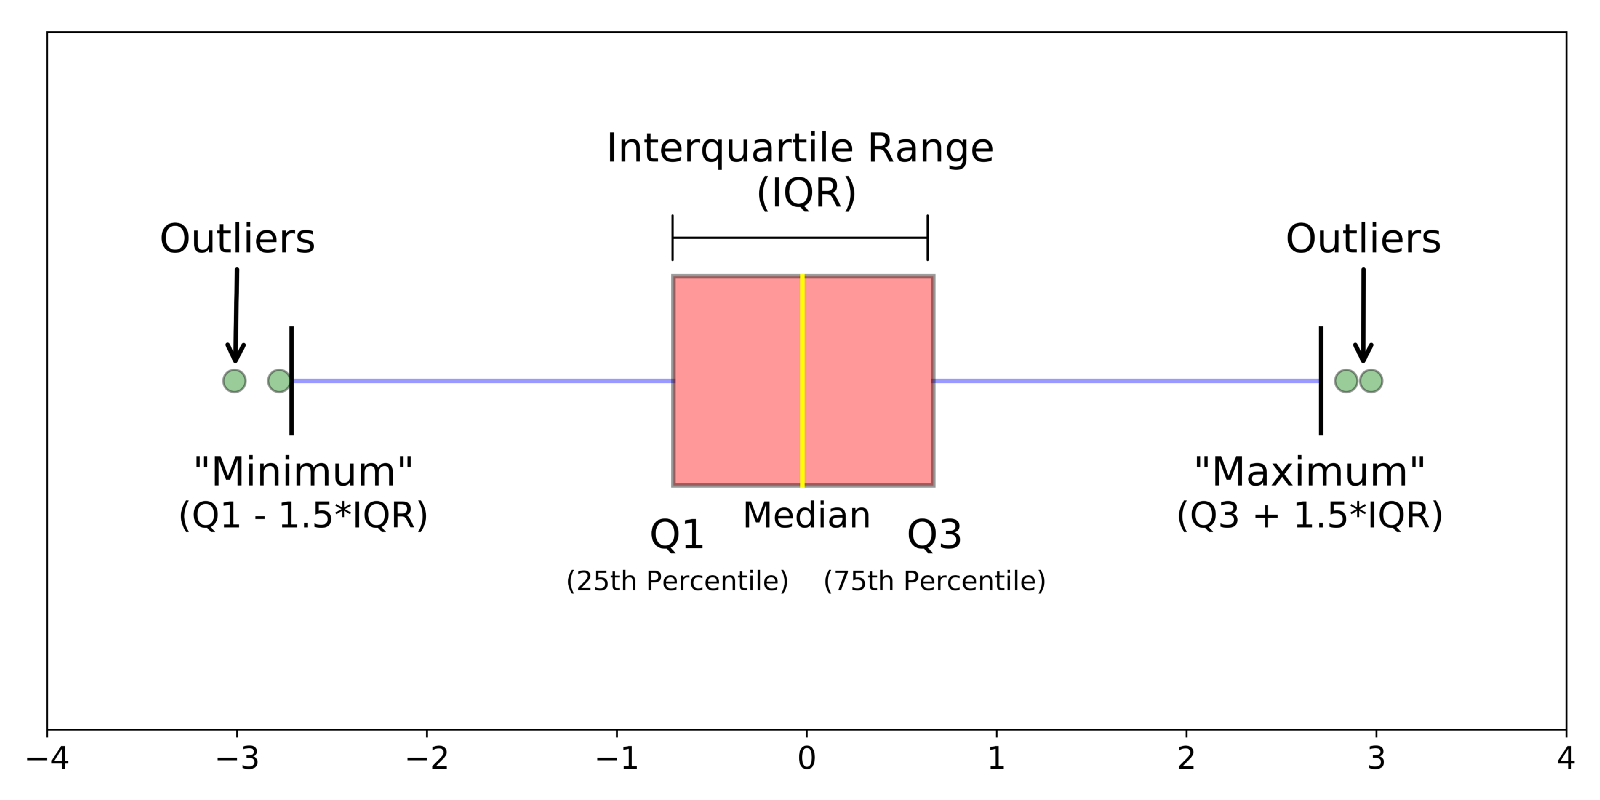

Boxplots are a standardized way of displaying the distribution of data based on a five number summary

* Minimum
* First Quartile (Q1)
* Median (Q2)
* Third Quartile (Q3)
* Maximum

* **Median (Q2 / 50th Percentile)**: The middle value of the dataset.
* **First Quartile (Q1 / 25th Percentile)**: The middle number between the smallest number (not the “minimum”) and the median of the dataset.
* **Third Quartile (Q3 / 75th Percentile)**: The middle value between the median and the highest value (not the “maximum”) of the dataset.


**Interquartile range (IQR)**: 25th to the 75th percentile.

* Maximum: Q3 + 1.5*IQR

* Minimum: Q1 - 1.5*IQR

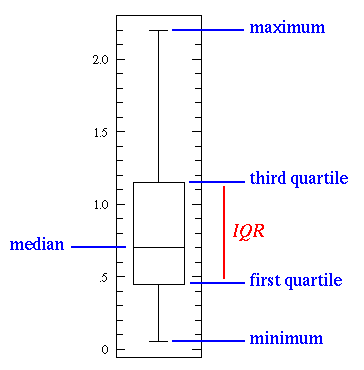

* This simplest possible box plot displays the full range of variation (from min to max), the likely range of variation (the IQR), and a typical value (the median).

* Not uncommonly real datasets will display surprisingly high maximums or surprisingly low minimums called outliers.

In [ ]:
# Q1 = np.percentile(data[variable],25)
# Q3 = np.percentile(data[variable],75)
# IQR = Q3 - Q1
# outlier_list = data[(data[variable] < IQR * 1.5) | (data[variable] > IQR * 1.5)].index       

Pclass - Survived
Sex - Survived
SibSp - Survived
Parch - Survived

In [ ]:
train_titanic_data.boxplot(column = "Pclass", by = "Sex")
plt.show()

<a id = "8"></a>
# Missing Value
* Find Missing Value
* Fill Missing Value

I am going to concatenate train and test values, in order to find missing values.

In [ ]:
train_df_len = len(train_titanic_data)
train_titanic_data = pd.concat([train_titanic_data,test_titanic_data],axis = 0).reset_index(drop = True)

In [ ]:
train_df_len

In [ ]:
len(train_titanic_data)

In [ ]:
train_titanic_data.head()

<a id = "9"></a>
## Find Missing Value

Firstly, in order to find missing values, we need to combine both train and test data. 

In [ ]:
whole_titanik_data = pd.concat([train_titanic_data,test_titanic_data], axis = 0)

In [ ]:
whole_titanik_data

In [ ]:
whole_titanik_data.columns

In [ ]:
whole_titanik_data.columns[whole_titanik_data.isnull().any()]

In [ ]:
whole_titanik_data.isnull().sum()

<a id = "10"></a>

## Fill Missing Value

* Fare has 1 missing value.
* Embarked has 2 missing value.
We are going to fill these missing variables.

In [ ]:
whole_titanik_data[whole_titanik_data["Embarked"].isnull()]

We can fill "Embarked" data by the help of passengers' class or by looking fare data and which seaport the passangers prefer to enter the ship.

In [ ]:
whole_titanik_data.boxplot(column = "Fare", by = "Embarked")
plt.show()

* The incomes of passengers boarding from the Q port can be said to be very low. Because the amount paid to the tickets is very small.
* The amount of money, paid by passengers who board the ship from the S port is also low.
* The passengers are most likely enter the ship from port C. 
So, we can fill these passengers' Embarked data as "C" port.


In [ ]:
whole_titanik_data["Embarked"] = whole_titanik_data["Embarked"].fillna("C")

In [ ]:
whole_titanik_data[whole_titanik_data["Embarked"].isnull()]

We don't have any missing value in "Embarked" column.

In [ ]:
whole_titanik_data[whole_titanik_data["Fare"].isnull()]

In [ ]:
whole_titanik_data["Fare"] = whole_titanik_data["Fare"].fillna(np.mean(whole_titanik_data[whole_titanik_data["Pclass"] == 3]["Fare"]))

In [ ]:
whole_titanik_data[whole_titanik_data["Fare"].isnull()]

<a id = "11"></a>
# Visualization

<a id = "12"></a>
# Correlation Between Sibsp - Parch - Age - Fare - Survived

In order to see correlation between different variables, we use "Heatmap".

In [ ]:
plt.figure(figsize = (10,10))
data_list = train_titanic_data[["SibSp", "Parch", "Age", "Fare", "Survived"]]
sns.heatmap(data_list.corr(), annot = True, linewidths = .5, fmt = ".2f")
plt.title("Correlation Between SibSp, Parch, Age, Fare and Survived")
plt.show()

We can say that the survival rate of passengers who pay a lot of money for the ticket is high.

<a id = "13"></a>
# Correlation Between Sibsp - Survived

I am going to use factor plot to visualize SipSp and Survived variables.

In [ ]:
sns.factorplot(x = "SibSp", y = "Survived", data = train_titanic_data, kind = "bar", palette = "muted")
plt.ylabel("Survived Probability")
plt.show()

<a id = "14"></a>
# Correlation Between Parch - Survived

In [ ]:
sns.factorplot(x = "Parch", y = "Survived", data = train_titanic_data, kind = "bar", palette = "muted")
plt.ylabel("Survived Probability")
plt.show()

Black line in the figure has a meaning standard deviation. For example, 3 parch variable has a survive probability (averge) 0.6 but the standard deviation has the large range. So the probability also can be minimum 0.2 and maximum 1. 

<a id = "15"></a>
# Correlation Between Pclass - Survived

In [ ]:
sns.factorplot(x = "Pclass", y = "Survived", data = train_titanic_data, kind = "bar", palette = "muted")
plt.ylabel("Survived Probability")
plt.show()

<a id = "16"></a>
# Correlation Between Age - Survived

In [ ]:
graph = sns.FacetGrid(train_titanic_data, col = "Survived")
graph.map(sns.distplot, "Age", bins = 25)
plt.show()

* We see that there are many babies in the surviving group. ( Look at the graph on the right side.)
* Large number of 20 years old did not survive.

<a id = "17"></a>
# Correlation Between Pclass - Age - Survived

In [ ]:
g = sns.FacetGrid(train_titanic_data, col = "Survived", row = "Pclass", size = 3)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

The number of 3rd class passengers are higher than the other classes.

<a id = "18"></a>
# Correlation Between Embarked - Sex - Pclass - Survived

In [ ]:
graph = sns.FacetGrid(train_titanic_data, col = "Embarked")
graph.map(sns.pointplot, "Pclass", "Survived", "Sex", bins = 25)
plt.legend()
plt.show()

<a id = "19"></a>
# Correlation Between Embarked - Sex - Fare - Survived

In [ ]:
g = sns.FacetGrid(train_titanic_data, row = "Embarked", col = "Survived", size = 3)
g.map(sns.barplot, "Sex", "Fare")
plt.legend()
plt.show()

* Passengers who pay higher fare have better survival. Fare can be used as categorical for training.

<a id = "20"></a>
# Fill Missing Age Value

In [ ]:
train_titanic_data[train_titanic_data.Age.isnull()]

In [ ]:
sns.boxplot(x = "Sex", y = "Age", data = train_titanic_data)
plt.show()

As you can see, by looking at the gender variable, we cannot predict people's age. Because both female and male people have the same median value.

In [ ]:
sns.boxplot(x = "Sex", y = "Age", hue = "Pclass", data = train_titanic_data)
plt.show()

1st class passengers are older than 2nd class passengers. 2nd class passengers are older than 3rd class.

In [ ]:
sns.boxplot(x = "Parch", y = "Age", data = train_titanic_data)
plt.show()

In [ ]:
sns.boxplot(x = "SibSp", y = "Age", data = train_titanic_data)
plt.show()

In [ ]:
sns.heatmap(train_titanic_data[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot = True)
plt.show()

I tried to see the correlation between these 5 variables. But age variable wasn't seen in the plot. Because it has a type string. I need to make it numerical:

In [ ]:
train_titanic_data["Sex"] = [0 if i == "female" else 1 for i in train_titanic_data.Sex]

In [ ]:
train_titanic_data["Sex"]

In [ ]:
sns.heatmap(train_titanic_data[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot = True)
plt.show()

* If we want to predict age, we cannot use gender variable because, they don't have any correlation.(0.093)
* But using SibSp, Parch and Pclass, we can meke a prediction.

Now, we will try to write a code to complete missing "age" variables.

In [ ]:
index_nan_age = list(train_titanic_data["Age"][train_titanic_data["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_titanic_data["Age"][((train_titanic_data["SibSp"] == train_titanic_data.iloc[i]["SibSp"]) &(train_titanic_data["Parch"] == train_titanic_data.iloc[i]["Parch"])& (train_titanic_data["Pclass"] == train_titanic_data.iloc[i]["Pclass"]))].median()
    age_med = train_titanic_data["Age"].median()
    if not np.isnan(age_pred):
        train_titanic_data["Age"].iloc[i] = age_pred
    else:
        train_titanic_data["Age"].iloc[i] = age_med

In [ ]:
train_titanic_data[train_titanic_data.Age.isnull()]

So there is no missing age value.

<a id = "21"></a>
# Feature Engineering

<a id = "22"></a>
## Name -- Title

In [ ]:
train_titanic_data.Name.head(10)

We can calculate the probability of people, who could survive, by looking at their genders. (Mr./ Mrs./ Miss etc)

In [ ]:
names = train_titanic_data.Name
names

In [ ]:
name_list = []
for name in names:
    name = name.split(".")  
    name_list.append(name)

In [ ]:
name_list[0:5]

In [ ]:
first_part = []
for words in name_list:
    first_part.append(words[0])
    

In [ ]:
first_part[0:5]

In [ ]:
gender_list = []
for word in first_part:
    word = word.split(",")
    gender_list.append(word)

In [ ]:
gender_list[0:5]

In [ ]:
genders = []
for gender in gender_list:
    genders.append(gender[-1].strip())

In [ ]:
genders[0:5]

In [ ]:
train_titanic_data["Title"] = genders

In [ ]:
train_titanic_data["Title"].head(10)

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Title", data = train_titanic_data)
plt.xticks(rotation = 60)
plt.show()

Let's categorize these 17 features:

In [ ]:
train_titanic_data["Title"] = train_titanic_data["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_titanic_data["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_titanic_data["Title"]]

In [ ]:
train_titanic_data["Title"].head(10)

In [ ]:
sns.countplot(x = train_titanic_data.Title)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
sns.factorplot(x = "Title", y = "Survived", kind = "bar",data = train_titanic_data, palette = "muted")
plt.xlabel("Title")
plt.ylabel("Survived Probability")
plt.show()

The ones with the highest survival rate are women and the lowest are men.

We don't need "Name" feature any more. We can delete it. 

In [ ]:
train_titanic_data = train_titanic_data.drop("Name", axis = 1)

In [ ]:
train_titanic_data.head()

In [ ]:
train_titanic_data["Title"] = train_titanic_data["Title"].astype("category")
train_titanic_data = pd.get_dummies(train_titanic_data, columns= ["Title"])
train_titanic_data.head()

<a id = "23"></a>
## Family -- Size

In [ ]:
train_titanic_data.head()

Let us sum up SibSp and Parch to get the family size.

In [ ]:
train_titanic_data["Family_Size"] = train_titanic_data.SibSp + train_titanic_data.Parch + 1

In [ ]:
train_titanic_data.head()

In [ ]:
sns.factorplot(x = "Family_Size", y = "Survived", data = train_titanic_data, kind = "bar")
plt.xlabel("Family Size")
plt.ylabel("Survived")
plt.show()

Let's give a trashold value for family size. If it is smaller than 5 we give 1, else 0.

In [ ]:
train_titanic_data["Survived_Family"] = [1 if i < 5 else 0 for i in train_titanic_data["Family_Size"]]

In [ ]:
train_titanic_data.head()

In [ ]:
sns.countplot(x = "Survived_Family", data = train_titanic_data)
plt.show()

Let's calculate the ratio of survived family.

In [ ]:
sns.factorplot(x = "Survived_Family", y = "Survived", data = train_titanic_data, kind = "bar")
plt.show()

Small families have more chance to survive when we compare with large families.

<a id = "24"></a>
## Embarked

In [ ]:
train_titanic_data.Embarked.head()

In [ ]:
sns.countplot(x = "Embarked", data = train_titanic_data)
plt.show()

In [ ]:
train_titanic_data["Embarked"] = train_titanic_data["Embarked"].astype("category")
train_titanic_data = pd.get_dummies(train_titanic_data, columns= ["Embarked"])
train_titanic_data.head()

<a id = "25"></a>
## Ticket

In [ ]:
train_titanic_data.Ticket.head()

In [ ]:
tickets = []
for i in list(train_titanic_data.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_titanic_data["Ticket"] = tickets

In [ ]:
train_titanic_data.head(20)

In [ ]:
train_titanic_data["Ticket"] = train_titanic_data["Ticket"].astype("category")
train_titanic_data = pd.get_dummies(train_titanic_data, columns= ["Ticket"])
train_titanic_data.head()

<a id = "26"></a>
## Pclass

In [ ]:
sns.countplot(x = "Pclass", data = train_titanic_data)
plt.show()

In [ ]:
train_titanic_data["Pclass"] = train_titanic_data["Pclass"].astype("category")
train_titanic_data = pd.get_dummies(train_titanic_data, columns= ["Pclass"])
train_titanic_data.head()

<a id = "27"></a>
## Sex

In [ ]:
train_titanic_data["Sex"] = train_titanic_data["Sex"].astype("category")
train_titanic_data = pd.get_dummies(train_titanic_data, columns= ["Sex"])
train_titanic_data.head()

<a id = "28"></a>
## Drop Passenger Id and Cabin

In [ ]:
train_titanic_data.columns

In [ ]:
train_titanic_data = train_titanic_data.drop(["Cabin"], axis = 1)

<a id = "29"></a>
# Modeling

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id = "30"></a>
## Train - Test Split

In [ ]:
train_df_len

In [ ]:
test = train_titanic_data[train_df_len:]
test.drop(labels = ["Survived"], axis = 1, inplace = True)

In [ ]:
test.head()

In [ ]:
train_titanic_data.head()

In [ ]:
train = train_titanic_data[:train_df_len]
x_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.33, random_state = 42)

In [ ]:
print("x_train",len(x_train))
print("x_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

<a id = "31"></a>
## Simple Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

In [ ]:
accuracy_logreg_train = logreg.score(x_train, y_train)
print("Training accuracy: %", round(accuracy_logreg_train*100,2))

In [ ]:
accuracy_logreg_test = logreg.score(x_test, y_test)
print("Testing accuracy: %", round(accuracy_logreg_test*100,2))

<a id = "32"></a>
## Hyperparameter Tuning -- Grid Search -- Cross Validation

I am going to compare 5 different Machine Learning models which are:
* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

Then I am going to try to find best parameter (hyperparameter tuning) between these parameters. While I am trying to find hyperparameter, I will use Grid Search method. While comparing hyperparameters, I am going to use Cross Validation.

In [ ]:
classifier = [DecisionTreeClassifier(random_state = 42), SVC(random_state = 42), RandomForestClassifier(random_state = 42),
              LogisticRegression(random_state = 42), KNeighborsClassifier()]


dt_param_grid = {"min_samples_split" : range(10,500,20), "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"], "gamma": [0.001, 0.01, 0.1, 1], "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10], "min_samples_split":[2,3,10], "min_samples_leaf":[1,3,10],
                "bootstrap":[False], "n_estimators":[100,300], "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7), "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(), "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid, svc_param_grid, rf_param_grid, logreg_param_grid, knn_param_grid]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a id = "33"></a>
## Ensemble Modeling

In [ ]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]), ("rfc",best_estimators[2]), ("lr",best_estimators[3])], voting = "soft", n_jobs = -1)

votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_test),y_test)*100)